In [671]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re


# Load the dataset
df = pd.read_csv("/content/my_dataaaa.csv")  # Replace "your_dataset.csv" with the path to your actual dataset file

# Step 1: Handling Missing Values (if any)
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Interest    0
Skills      1
Grades      0
Degree      0
dtype: int64


In [672]:
df

,Interest,Skills,Grades,Degree
0,Web Development,Front-end Development,85,Bachelor of Science in Computer Science
1,Programming,Algorithm Design,82,Bachelor of Science in Computer Science
2,Business Management,Strategic Planning,78,Bachelor of Business Administration
3,Crop Management,Agricultural Economics,80,Bachelor of Science in Agriculture
4,Structural Engineering,Civil Engineering Design,85,Bachelor of Engineering in Civil Engineering
...,...,...,...,...
640,Broadcast Journalism,podcasting,87,Bachelor of Arts in Mass Communication
641,Urban Sociology,Gender Studies,62,Bachelor of Arts in Sociology
642,Criminal Psychology,Criminal Behavior Analysis,88,Bachelor of Arts in Criminology
643,Mobile App Development,Android Development,77,Bachelor of Science in Computer Science


In [673]:
df['Degree'].value_counts()

Degree
Bachelor of Business Administration                    156
Bachelor of Science in Computer Science                127
Bachelor of Laws (LLB)                                  46
Bachelor of Fine Arts                                   44
Bachelor of Arts in Mass Communication                  44
Bachelor of Arts in Sociology                           44
Bachelor of Engineering in Civil Engineering            43
Bachelor of Arts in Criminology                         43
Bachelor of Science in Agriculture                      39
Bachelor of Arts in Psychology                          39
Bachelor of Medicine and Bachelor of Surgery (MBBS)     20
Name: count, dtype: int64

In [674]:
df.shape

(645, 4)

In [675]:
df.duplicated().sum()

128

In [676]:
df.describe()

,Grades
count,645.000000
mean,84.300775
std,5.587204
min,51.000000
25%,83.000000
50%,85.000000
75%,87.000000
max,96.000000


In [677]:
one_hot_encoded = pd.get_dummies(df['Interest'], prefix='Interest')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'Interest' column
df_encoded.drop(columns=['Interest'], inplace=True)

In [678]:
one_hot_encoded = pd.get_dummies(df_encoded['Skills'], prefix='Skills')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

# Drop the original 'Interest' column
df_encoded.drop(columns=['Skills'], inplace=True)

In [679]:
X = df_encoded.drop('Degree', axis = 1)
y = df_encoded['Degree']

In [680]:
X

,Grades,Interest_Agricultural Economics,Interest_Agricultural Engineering,Interest_Agroforestry,Interest_Agronomy,Interest_Algorithms,Interest_Anatomy,Interest_Animal Husbandry,Interest_Animal Nutrition,Interest_Animal Science,...,Skills_Water Resource Management,Skills_Water Treatment,Skills_Wealth Management,Skills_Web Analytics,Skills_Web Application Development,Skills_Web Development,Skills_Youth Counseling,Skills_Youth Outreach,Skills_Youth Rehabilitation,Skills_podcasting
0,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,82,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,78,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,80,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,87,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
641,62,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
642,88,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
643,77,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [681]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [682]:
X_train

,Grades,Interest_Agricultural Economics,Interest_Agricultural Engineering,Interest_Agroforestry,Interest_Agronomy,Interest_Algorithms,Interest_Anatomy,Interest_Animal Husbandry,Interest_Animal Nutrition,Interest_Animal Science,...,Skills_Water Resource Management,Skills_Water Treatment,Skills_Wealth Management,Skills_Web Analytics,Skills_Web Application Development,Skills_Web Development,Skills_Youth Counseling,Skills_Youth Outreach,Skills_Youth Rehabilitation,Skills_podcasting
515,91,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
274,78,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
576,86,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
434,86,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,80,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106,83,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
435,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Random Forest Classifier

In [683]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [684]:
# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8604651162790697


In [685]:
X_test

,Grades,Interest_Agricultural Economics,Interest_Agricultural Engineering,Interest_Agroforestry,Interest_Agronomy,Interest_Algorithms,Interest_Anatomy,Interest_Animal Husbandry,Interest_Animal Nutrition,Interest_Animal Science,...,Skills_Water Resource Management,Skills_Water Treatment,Skills_Wealth Management,Skills_Web Analytics,Skills_Web Application Development,Skills_Web Development,Skills_Youth Counseling,Skills_Youth Outreach,Skills_Youth Rehabilitation,Skills_podcasting
632,87,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
592,71,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
599,86,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291,81,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72,84,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
631,86,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
608,85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [686]:
new_data = pd.DataFrame({
    'Grades': [75],
    'Interest': ['Algorithms'],
    'Skills': ['Web Development']

})

# One-hot encode the 'Interest' column
new_data_encoded = pd.get_dummies(new_data, columns=['Interest'], prefix='Interest')


In [687]:
columns = X_train.columns

In [688]:
file_path = 'columns.txt'

# Write column names to the text file
with open(file_path, 'w') as file:
    for column_name in columns:
        file.write(column_name + '\n')

In [689]:
new_data_encoded = pd.get_dummies(new_data['Interest'], prefix='Interest')
new_data_encoded = pd.get_dummies(new_data['Skills'], prefix='Skills')

# Align the columns of new_data_encoded with those of X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make prediction
predicted_degree = rf_model.predict(new_data_encoded)
print("Recommended Degree:", predicted_degree)

Recommended Degree: ['Bachelor of Business Administration']


In [690]:
import pickle

In [691]:
with open('matric_model_69.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

Naive Bayes

In [692]:
from sklearn.naive_bayes import GaussianNB

In [693]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [694]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Create a Gaussian Naive Bayes classifier
naive_bayes_model1 = GaussianNB()

# Define the number of folds (e.g., k=5 for 5-fold cross-validation)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Perform k-fold cross-validation
cross_val_scores = cross_val_score(naive_bayes_model1, X_train, y_train, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean CV accuracy:", np.mean(cross_val_scores))

Cross-validation scores: [0.86538462 0.84615385 0.86538462 0.82692308 0.80769231 0.78846154
 0.92156863 0.8627451  0.8627451  0.92156863]
Mean CV accuracy: 0.8568627450980394


In [695]:
y_pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8914728682170543


In [696]:
new_data = pd.DataFrame({
    'Grades': [75],
    'Interest': ['Agroforestry'],
    'Skills': ['Water Treatment']

})

# One-hot encode the 'Interest' column
new_data_encoded = pd.get_dummies(new_data, columns=['Interest'], prefix='Interest')

In [697]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [698]:
new_data_encoded = pd.get_dummies(new_data['Interest'], prefix='Interest')
new_data_encoded = pd.get_dummies(new_data['Skills'], prefix='Skills')

# Align the columns of new_data_encoded with those of X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make prediction
predicted_degree = naive_bayes_model.predict(new_data_encoded)
print("Recommended Degree:", predicted_degree)

Recommended Degree: ['Bachelor of Engineering in Civil Engineering']


In [699]:
from joblib import dump, load

# Save the model using joblib
dump(naive_bayes_model, 'nb_model.joblib')

# Load the model using joblib
model = load('nb_model.joblib')


In [700]:
model.predict(new_data_encoded)

array(['Bachelor of Engineering in Civil Engineering'], dtype='<U51')

In [701]:
interests = [
    "Interest_Agricultural Economics",
    "Interest_Agricultural Engineering",
    "Interest_Agroforestry",
    "Interest_Agronomy",
    "Interest_Algorithms",
    "Interest_Anatomy",
    "Interest_Animal Husbandry",
    "Interest_Animal Nutrition",
    "Interest_Animal Science",
    "Interest_Animation",
    "Interest_Artificial Intelligence",
    "Interest_Behavioral Neuroscience",
    "Interest_Botany",
    "Interest_Broadcast Journalism",
    "Interest_Broadcast Production",
    "Interest_Business Analytics",
    "Interest_Business Development",
    "Interest_Business Management",
    "Interest_Business Strategy",
    "Interest_Child Development",
    "Interest_Child Psychology",
    "Interest_Civil Engineering",
    "Interest_Clinical Neuropsychology",
    "Interest_Clinical Psychology",
    "Interest_Clinical Psychology Research",
    "Interest_Cloud Architecture",
    "Interest_Cloud Computing",
    "Interest_Cognitive Neuroscience",
    "Interest_Cognitive Psychology",
    "Interest_Community Development",
    "Interest_Community Sociology",
    "Interest_Computer Graphics",
    "Interest_Computer Networks",
    "Interest_Computer Vision",
    "Interest_Constitutional Law",
    "Interest_Construction Management",
    "Interest_Consumer Behavior",
    "Interest_Consumer Psychology",
    "Interest_Content Marketing",
    "Interest_Content Marketing Strategy",
    "Interest_Content Production",
    "Interest_Content Writing",
    "Interest_Corporate Finance",
    "Interest_Counseling Psychology",
    "Interest_Crime Prevention",
    "Interest_Criminal Investigation",
    "Interest_Criminal Justice",
    "Interest_Criminal Justice Policy",
    "Interest_Criminal Justice Reform",
    "Interest_Criminal Law",
    "Interest_Criminal Procedure",
    "Interest_Criminal Profiling",
    "Interest_Criminal Psychology",
    "Interest_Criminology",
    "Interest_Crop Management",
    "Interest_Crop Science",
    "Interest_Customer Relationship Management",
    "Interest_Customer Service Management",
    "Interest_Cyber Defense",
    "Interest_Cybersecurity",
    "Interest_Cybersecurity Governance",
    "Interest_Data Analysis",
    "Interest_Data Mining",
    "Interest_Data Science",
    "Interest_Data Structures",
    "Interest_Database Administration",
    "Interest_Database Development",
    "Interest_Database Management",
    "Interest_Database Systems",
    "Interest_Deep Learning",
    "Interest_Demography",
    "Interest_Developmental Psychology",
    "Interest_Digital Advertising",
    "Interest_Digital Animation",
    "Interest_Digital Art",
    "Interest_Digital Content Creation",
    "Interest_Digital Illustration",
    "Interest_Digital Journalism",
    "Interest_Digital Marketing",
    "Interest_Digital Marketing Analytics",
    "Interest_Digital Marketing Strategy",
    "Interest_Digital Media Production",
    "Interest_Digital Painting",
    "Interest_Digital Photography",
    "Interest_Digital Sculpture",
    "Interest_Digital Storytelling",
    "Interest_Digital Strategy",
    "Interest_E-commerce",
    "Interest_E-commerce Strategies",
    "Interest_Entrepreneurial Finance",
    "Interest_Entrepreneurship",
    "Interest_Environmental Engineering",
    "Interest_Environmental Law",
    "Interest_Environmental Policy",
    "Interest_Environmental Science",
    "Interest_Environmental Sociology",
    "Interest_Financial Analysis",
    "Interest_Financial Management",
    "Interest_Financial Modeling",
    "Interest_Financial Planning",
    "Interest_Financial Risk Management",
    "Interest_Fine Arts",
    "Interest_Forensic Psychology",
    "Interest_Forensic Science",
    "Interest_Front-end Development",
    "Interest_Full-stack Development",
    "Interest_Game Design",
    "Interest_Game Development",
    "Interest_Gender Studies",
    "Interest_Genetics",
    "Interest_Geographic Information Systems",
    "Interest_Geotechnical Engineering",
    "Interest_Graphic Design",
    "Interest_Health Psychology",
    "Interest_Horticulture",
    "Interest_Human Resource Development",
    "Interest_Human Rights Law",
    "Interest_Hydraulic Engineering",
    "Interest_Illustration",
    "Interest_Industrial Psychology",
    "Interest_Industrial-Organizational Psychology",
    "Interest_Information Privacy",
    "Interest_Information Retrieval",
    "Interest_Information Security",
    "Interest_Intellectual Property Law",
    "Interest_Intellectual Property Rights",
    "Interest_International Business Law",
    "Interest_International Environmental Law",
    "Interest_International Humanitarian Law",
    "Interest_International Law",
    "Interest_International Trade Law",
    "Interest_Investment Analysis",
    "Interest_Investment Banking",
    "Interest_Journalism Ethics",
    "Interest_Juvenile Justice",
    "Interest_Law",
    "Interest_Logistics Management",
    "Interest_Machine Learning",
    "Interest_Market Analysis",
    "Interest_Market Research",
    "Interest_Marketing Research",
    "Interest_Marketing Strategy",
    "Interest_Mass Communication",
    "Interest_Media Ethics",
    "Interest_Media Production",
    "Interest_Mobile App Development",
    "Interest_Mobile Development",
    "Interest_Mobile Game Development",
    "Interest_Multimedia Journalism",
    "Interest_Natural Language Processing",
    "Interest_Network Administration",
    "Interest_Network Security",
    "Interest_Neuroscience",
    "Interest_Online Retail",
    "Interest_Operations Management",
    "Interest_Organizational Behavior",
    "Interest_Organizational Psychology",
    "Interest_Orthopedic Surgery",
    "Interest_Pediatric Surgery",
    "Interest_Photography",
    "Interest_Plant Breeding",
    "Interest_Plant Genetics",
    "Interest_Plant Pathology",
    "Interest_Plant Physiology",
    "Interest_Plastic Surgery",
    "Interest_Printmaking",
    "Interest_Programming",
    "Interest_Project Management",
    "Interest_Public Relations",
    "Interest_Public Relations Campaigns",
    "Interest_Retail Management",
    "Interest_Retail Operations",
    "Interest_Rural Sociology",
    "Interest_Sales Management",
    "Interest_Sculpture",
    "Interest_Search Engine Optimization",
    "Interest_Social Development",
    "Interest_Social Media Advertising",
    "Interest_Social Media Management",
    "Interest_Social Media Marketing",
    "Interest_Social Media Strategy",
    "Interest_Social Movements",
    "Interest_Social Policy Analysis",
    "Interest_Social Psychology",
    "Interest_Social Research",
    "Interest_Social Stratification",
    "Interest_Social Welfare",
    "Interest_Sociology of Education",
    "Interest_Software Development",
    "Interest_Software Engineering",
    "Interest_Soil Science",
    "Interest_Strategic Leadership",
    "Interest_Strategic Management",
    "Interest_Strategic Planning",
    "Interest_Structural Analysis",
    "Interest_Structural Engineering",
    "Interest_Supply Chain Management",
    "Interest_Supply Chain Optimization",
    "Interest_Transportation Engineering",
    "Interest_Transportation Planning",
    "Interest_Urban Planning",
    "Interest_Urban Sociology",
    "Interest_Urbanization",
    "Interest_Victim Advocacy",
    "Interest_Victimology",
    "Interest_Visual Arts",
    "Interest_Water Quality Management",
    "Interest_Water Resource Management",
    "Interest_Water Resources Engineering",
    "Interest_Water Resources Management",
    "Interest_Web Application Development",
    "Interest_Web Design",
    "Interest_Web Development",
    "Interest_Youth Justice"
]

skills = [
    "Skills_3D Animation",
    "Skills_3D Modeling",
    "Skills_3D Modelling",
    "Skills_Agribusiness Management",
    "Skills_Agricultural Economics",
    "Skills_Agricultural Extension",
    "Skills_Agricultural Mechanization",
    "Skills_Agricultural Sociology",
    "Skills_Agronomy",
    "Skills_Algorithm Design",
    "Skills_Andriod Development",
    "Skills_Android Development",
    "Skills_Android Development",
    "Skills_Android Development67",
    "Skills_Animal Nutrition",
    "Skills_Animation",
    "Skills_Animation",
    "Skills_Artificial Intelligence",
    "Skills_Artificial Neural Networks",
    "Skills_Artistic Expression",
    "Skills_Backend Development",
    "Skills_Behavioral Analysis",
    "Skills_Behavioral Psychology",
    "Skills_Biology Research",
    "Skills_Body Analysis",
    "Skills_Brand Development",
    "Skills_Brand Management",
    "Skills_Broadcast News Reporting",
    "Skills_Business Development",
    "Skills_Business Planning",
    "Skills_Business Strategy",
    "Skills_Ceramics",
    "Skills_Change Management",
    "Skills_Channel Management",
    "Skills_Character Animation",
    "Skills_Character Design",
    "Skills_Character Rigging",
    "Skills_Child Psychology",
    "Skills_Child Therapy",
    "Skills_Civil Engineering Design",
    "Skills_Client Relationship Management",
    "Skills_Climate Change Law",
    "Skills_Cloud Computing Platforms",
    "Skills_Cognitive Neuroscience",
    "Skills_Cognitive Psychology",
    "Skills_Commercial Law",
    "Skills_Community Development",
    "Skills_Community Engagement",
    "Skills_Community Engagement",
    "Skills_Community Outreach",
    "Skills_Community Planning",
    "Skills_Community Policing",
    "Skills_Complaint Handling",
    "Skills_Computer Vision",
    "Skills_Concept Art",
    "Skills_Concept Design",
    "Skills_Conservation Biology",
    "Skills_Constitutional Law",
    "Skills_Construction Engineering",
    "Skills_Construction Management",
    "Skills_Consumer Behavior",
    "Skills_Consumer Behavior Analysis",
    "Skills_Consumer Insights",
    "Skills_Content Creation",
    "Skills_Content Management",
    "Skills_Content Marketing",
    "Skills_Content Optimization",
    "Skills_Content Planning",
    "Skills_Content Strategy",
    "Skills_Contract Law",
    "Skills_Copyright Law",
    "Skills_Corporate Communication",
    "Skills_Corporate Strategy",
    "Skills_Corrections Management",
    "Skills_Cosmetic Surgery",
    "Skills_Crime Analysis",
    "Skills_Crime Scene Analysis",
    "Skills_Criminal Behavior Analysis",
    "Skills_Criminal Investigation",
    "Skills_Criminal Justice",
    "Skills_Criminal Profiling",
    "Skills_Criminalistics",
    "Skills_Criminological Theory",
    "Skills_Crop Protection",
    "Skills_Cross-platform Development",
    "Skills_Customs Law",
    "Skills_Cybersecurity",
    "Skills_Data Analysis",
    "Skills_Data Analytics",
    "Skills_Data Protection",
    "Skills_Data Science",
    "Skills_Data Security",
    "Skills_Data Structures",
    "Skills_Data Visualization",
    "Skills_Data Warehousing",
    "Skills_Database Administration",
    "Skills_Database Design",
    "Skills_Database Management",
    "Skills_Database Management Systems",
    "Skills_Database Optimization",
    "Skills_Database Systems",
    "Skills_Decision Making",
    "Skills_Deep Learning",
    "Skills_Deep Reinforcement Learning",
    "Skills_Developmental Psychology",
    "Skills_Digital Editing",
    "Skills_Digital Painting",
    "Skills_Disease Management",
    "Skills_Documentary Production",
    "Skills_Early Childhood Education",
    "Skills_Email Marketing",
    "Skills_Employee Motivation",
    "Skills_Employee Relations",
    "Skills_Employee Training",
    "Skills_Environmental Impact Assessment",
    "Skills_Environmental Remediation",
    "Skills_Etching",
    "Skills_Ethical Hacking",
    "Skills_Experimental Design",
    "Skills_Feminist Theory",
    "Skills_Film Editing",
    "Skills_Financial Analysis",
    "Skills_Financial Management",
    "Skills_Financial Modeling",
    "Skills_Financial Planning",
    "Skills_Financial Reporting",
    "Skills_Firewall Configuration",
    "Skills_Forensic Psychology",
    "Skills_Forensic Psychology",
    "Skills_Forensic Science",
    "Skills_Foundation Design",
    "Skills_Front-end Development",
    "Skills_Frontend Development",
    "Skills_Game Design",
    "Skills_Game Programming",
    "Skills_Gender Studies",
    "Skills_Genetic Engineering",
    "Skills_Genomic Analysis",
    "Skills_Geological Mapping",
    "Skills_Geological Surveying",
    "Skills_Geotechnical Engineering",
    "Skills_Geotechnical Investigation",
    "Skills_Graphic Design",
    "Skills_Group Dynamics",
    "Skills_Health Behavior",
    "Skills_Highway Design",
    "Skills_Human Resources Management",
    "Skills_Human Rights Law",
    "Skills_Humanitarian Law",
    "Skills_Hydrological Modeling",
    "Skills_Hydrology",
    "Skills_IT Risk Management",
    "Skills_IT Security",
    "Skills_Illustration Techniques",
    "Skills_Image Processing",
    "Skills_Incident Response",
    "Skills_Influencer Collaboration",
    "Skills_Influencer Marketing",
    "Skills_Infrastructure Design",
    "Skills_International Business Law",
    "Skills_International Business Transactions",
    "Skills_International Criminal Law",
    "Skills_International Criminal Law",
    "Skills_International Human Rights Law",
    "Skills_International Humanitarian Law",
    "Skills_International Refugee Law",
    "Skills_International Trade Law",
    "Skills_Inventory Control",
    "Skills_Inventory Management",
    "Skills_Investment Analysis",
    "Skills_Investment Management",
    "Skills_Investment Strategies",
    "Skills_Journalism",
    "Skills_Journalism Ethics",
    "Skills_Leadership",
    "Skills_Leadership Development",
    "Skills_Legal Analysis",
    "Skills_Legal Research",
    "Skills_Legal Writing",
    "Skills_Livestock Management",
    "Skills_Livestock Nutrition",
    "Skills_Logistics Management",
    "Skills_Logistics Management",
    "Skills_Logistics Planning",
    "Skills_Machine Learning",
    "Skills_Machine Learning Algorithms",
    "Skills_Market Analysis",
    "Skills_Market Research",
    "Skills_Marketing Analytics",
    "Skills_Marketing Analytics",
    "Skills_Media Law",
    "Skills_Media Literacy",
    "Skills_Media Relations",
    "Skills_Memory Research",
    "Skills_Merchandising",
    "Skills_Mind Read",
    "Skills_Mind Read",
    "Skills_Natural Language Processing",
    "Skills_Natural Resources Law",
    "Skills_Negotiation Skills",
    "Skills_Neonatal Surgery",
    "Skills_Network Administration",
    "Skills_Network Defense",
    "Skills_Network Security",
    "Skills_Neural Network Design",
    "Skills_Neural Networks",
    "Skills_Neuropsychological Assessment",
    "Skills_Neuropsychology",
    "Skills_News Anchoring",
    "Skills_News Reporting",
    "Skills_Online Advertising",
    "Skills_Online Marketing",
    "Skills_Online News Reporting",
    "Skills_Online Reporting",
    "Skills_Operations Management",
    "Skills_Organizational Behavior",
    "Skills_Orthopedic Trauma Surgery",
    "Skills_PPC Advertising",
    "Skills_Painting",
    "Skills_Patent Law",
    "Skills_Penetration Testing",
    "Skills_Photo Editing",
    "Skills_Photography Editing",
    "Skills_Photojournalism",
    "Skills_Photomanipulation",
    "Skills_Phycological Profiling",
    "Skills_Physiological Profiling",
    "Skills_Physiology",
    "Skills_Plant Breeding",
    "Skills_Plant Genetics",
    "Skills_Plant Nutrition",
    "Skills_Plant Pathology",
    "Skills_Plant Physiology",
    "Skills_Podcasting",
    "Skills_Population Studies",
    "Skills_Portfolio Management",
    "Skills_Project Management",
    "Skills_Project Planning",
    "Skills_Psychological Assessment",
    "Skills_Psychological Profiling",
    "Skills_Public Administration",
    "Skills_Public International Law",
    "Skills_Quantitative Analysis",
    "Skills_Race Relations",
    "Skills_Radio Broadcasting",
    "Skills_Reconstructive Procedures",
    "Skills_Reconstructive Surgery",
    "Skills_Reinforcement Learning",
    "Skills_Remote Sensing",
    "Skills_Restorative Justice",
    "Skills_Rural Development",
    "Skills_SEO Strategy",
    "Skills_SQL",
    "Skills_SQL Programming",
    "Skills_Screen Printing",
    "Skills_Scriptwriting",
    "Skills_Search Engine Marketing",
    "Skills_Search Engine Optimization",
    "Skills_Security Analysis",
    "Skills_Security Management",
    "Skills_Social Change",
    "Skills_Social Ecology",
    "Skills_Social Media Advertising",
    "Skills_Social Media Management",
    "Skills_Social Media Marketing",
    "Skills_Social Planning",
    "Skills_Sociological Theory",
    "Skills_Software Architecture",
    "Skills_Software Testing",
    "Skills_Soil Conservation",
    "Skills_Soil Science",
    "Skills_Spinal Surgery",
    "Skills_Startup Development",
    "Skills_Startup Management",
    "Skills_Statistical Analysis",
    "Skills_Storyboarding",
    "Skills_Strategic Planning",
    "Skills_Strategic Sales",
    "Skills_Strategic Sales Planning",
    "Skills_Structural Design",
    "Skills_Supply Chain Management",
    "Skills_Supply Chain Optimization",
    "Skills_Sustainable Development",
    "Skills_System Administration",
    "Skills_Team Leadership",
    "Skills_Team Management",
    "Skills_Television Broadcasting",
    "Skills_Television Directing",
    "Skills_Television Production",
    "Skills_Temperature Check",
    "Skills_Text Mining",
    "Skills_Therapeutic Techniques",
    "Skills_Trade Law",
    "Skills_Trade Policy",
    "Skills_Trademark Law",
    "Skills_Traffic Engineering",
    "Skills_Training and Development",
    "Skills_Transportation Engineering",
    "Skills_Transportation Engineering",
    "Skills_Transportation Planning",
    "Skills_Typography",
    "Skills_UI/UX Design",
    "Skills_Unity Game Engine",
    "Skills_Urban Regeneration",
    "Skills_Urban Studies",
    "Skills_User Experience Design",
    "Skills_User Interface Design",
    "Skills_Vector Art",
    "Skills_Venture Capital",
    "Skills_Victim Advocacy",
    "Skills_Video Editing",
    "Skills_Video Production",
    "Skills_Virtualization",
    "Skills_Water Quality Management",
    "Skills_Water Resource Management",
    "Skills_Water Treatment",
    "Skills_Wealth Management",
    "Skills_Web Analytics",
    "Skills_Web Application Development",
    "Skills_Web Development",
    "Skills_Youth Counseling",
    "Skills_Youth Outreach",
    "Skills_Youth Rehabilitation",
    "Skills_podcasting"
]


In [702]:
interest_index = pd.Index(interests)

In [703]:
skills_index = pd.Index(skills)

In [704]:
interest_index

Index(['Interest_Agricultural Economics', 'Interest_Agricultural Engineering',
       'Interest_Agroforestry', 'Interest_Agronomy', 'Interest_Algorithms',
       'Interest_Anatomy', 'Interest_Animal Husbandry',
       'Interest_Animal Nutrition', 'Interest_Animal Science',
       'Interest_Animation',
       ...
       'Interest_Victimology', 'Interest_Visual Arts',
       'Interest_Water Quality Management',
       'Interest_Water Resource Management',
       'Interest_Water Resources Engineering',
       'Interest_Water Resources Management',
       'Interest_Web Application Development', 'Interest_Web Design',
       'Interest_Web Development', 'Interest_Youth Justice'],
      dtype='object', length=214)

In [705]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Classifier Accuracy:", accuracy_tree)

# Save the model
with open('tree_model.pkl', 'wb') as f:
    pickle.dump(tree_model, f)


Decision Tree Classifier Accuracy: 0.7209302325581395


In [706]:
from sklearn.svm import SVC

# SVM Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)

# Save the model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


SVM Classifier Accuracy: 0.7984496124031008


In [707]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (replace '/path/to/your_dataset.csv' with your dataset path)
df = pd.read_csv("/content/my_dataaaa.csv")

# Preprocessing: Separate features (X) and target variable (y)
X = df.drop('Degree', axis=1)  # Features
y = df['Degree']                # Target variable

# Handle categorical variables using one-hot encoding
categorical_cols = ['Interest', 'Skills']  # Specify categorical column names
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier with k=5 (you can adjust the number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)



KNN Accuracy: 0.5658914728682171


In [708]:
# Encode the target variable
label_encoder = LabelEncoder()
df_encoded['Degree'] = label_encoder.fit_transform(df_encoded['Degree'])

# Split the data into features (X) and target (y)
X = df_encoded.drop('Degree', axis=1)
y = df_encoded['Degree']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)



XGBoost Classifier Accuracy: 0.6744186046511628


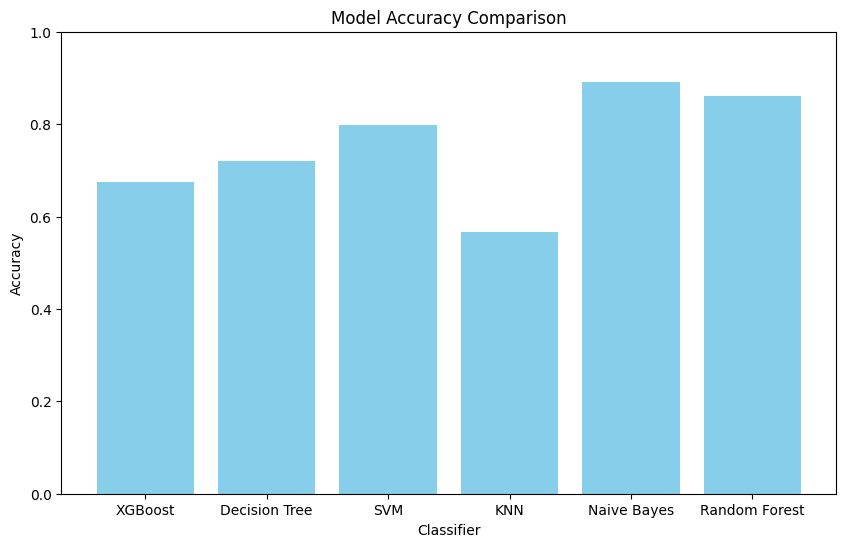

In [709]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load the dataset (replace '/content/my_dataaaa.csv' with your dataset path)
df = pd.read_csv("/content/my_dataaaa.csv")

# Preprocessing: Encode categorical features and target variable
label_encoder = LabelEncoder()
df['Degree'] = label_encoder.fit_transform(df['Degree'])

categorical_cols = ['Interest', 'Skills']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Degree', axis=1)
y = df_encoded['Degree']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'XGBoost': XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each classifier
accuracies = {}

for clf_name, clf in classifiers.items():
    if clf_name in ['SVM', 'KNN']:
        # Use scaled features for SVM and KNN
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[clf_name] = accuracy

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy range
plt.show()


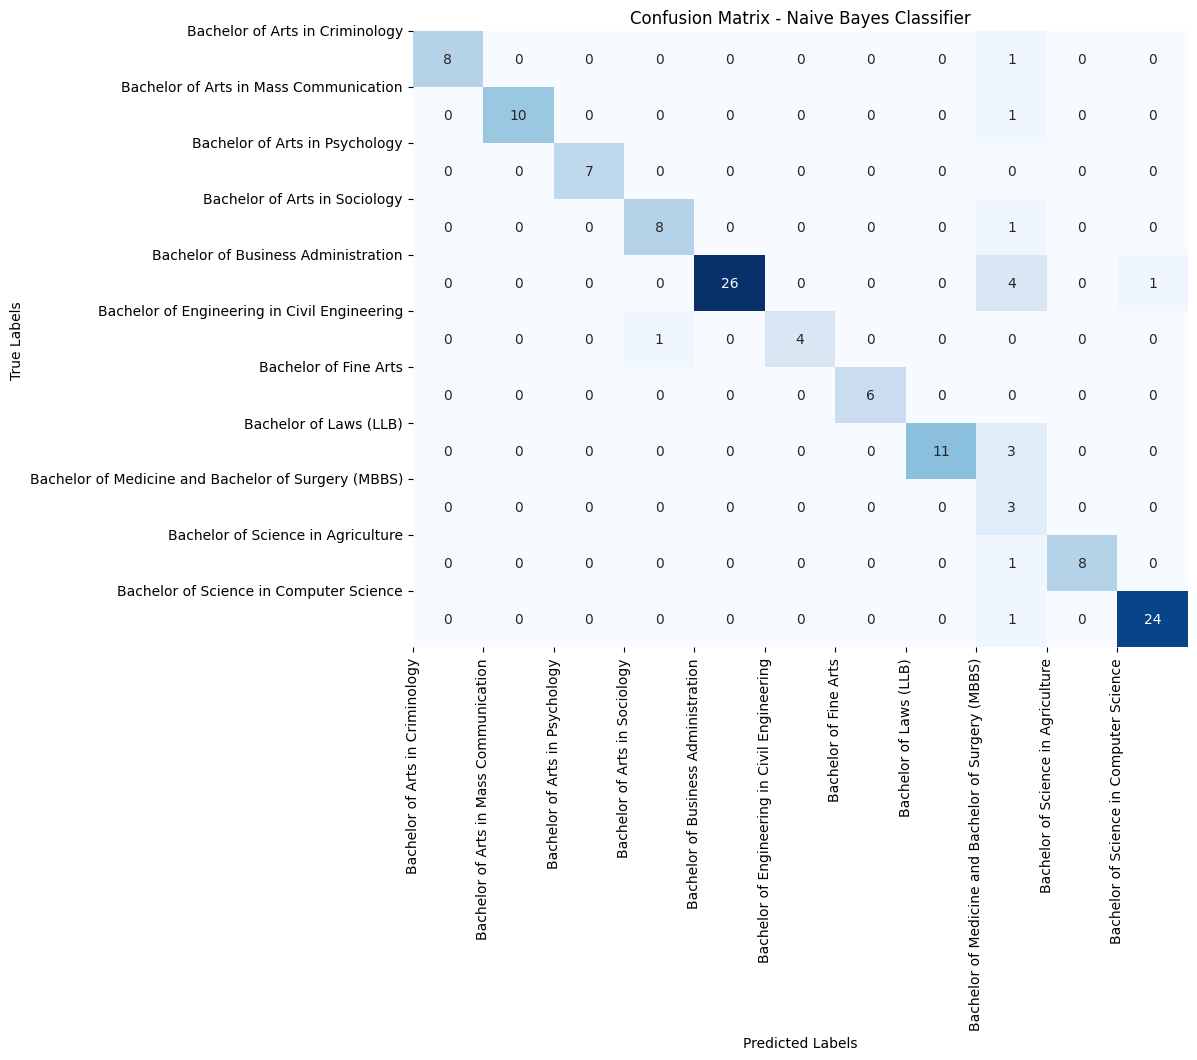

In [710]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np

# Load the dataset (replace '/content/my_dataaaa.csv' with your dataset path)
df = pd.read_csv("/content/my_dataaaa.csv")

# Preprocessing: Encode categorical features and target variable
label_encoder = LabelEncoder()
df['Degree'] = label_encoder.fit_transform(df['Degree'])

categorical_cols = ['Interest', 'Skills']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Degree', axis=1)
y = df_encoded['Degree']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=90)
plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=0)
plt.show()


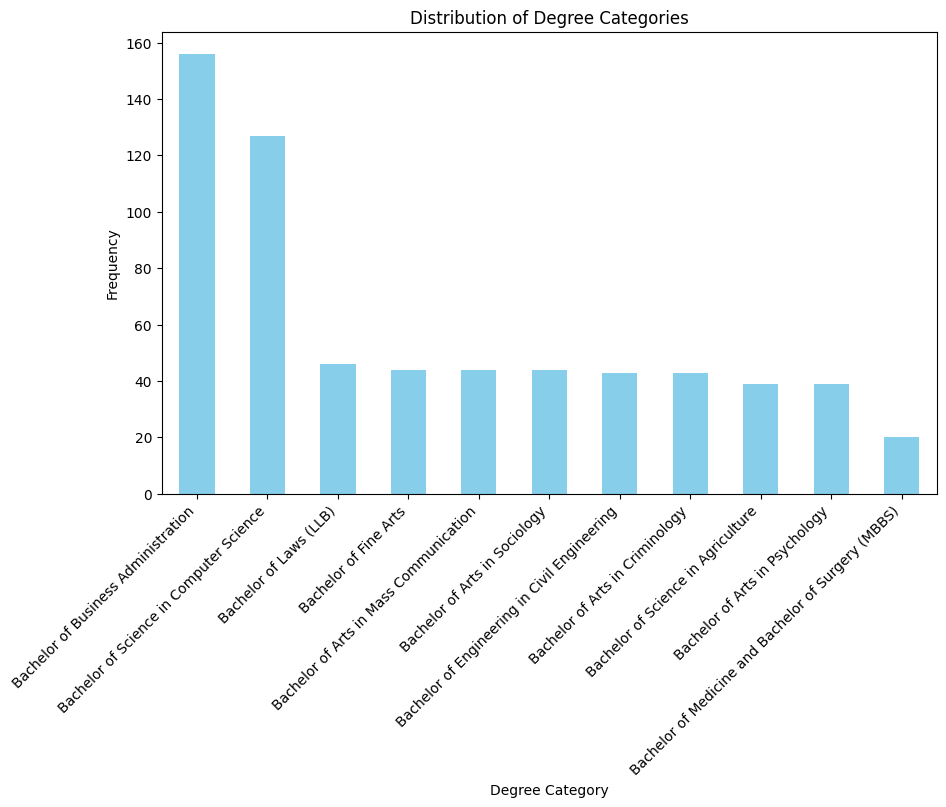

In [711]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace '/content/my_dataaaa.csv' with your dataset path)
df = pd.read_csv("/content/my_dataaaa.csv")

# Count the occurrences of each degree category
degree_counts = df['Degree'].value_counts()

# Plotting the bar chart for degree distribution
plt.figure(figsize=(10, 6))
degree_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Degree Categories')
plt.xlabel('Degree Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()



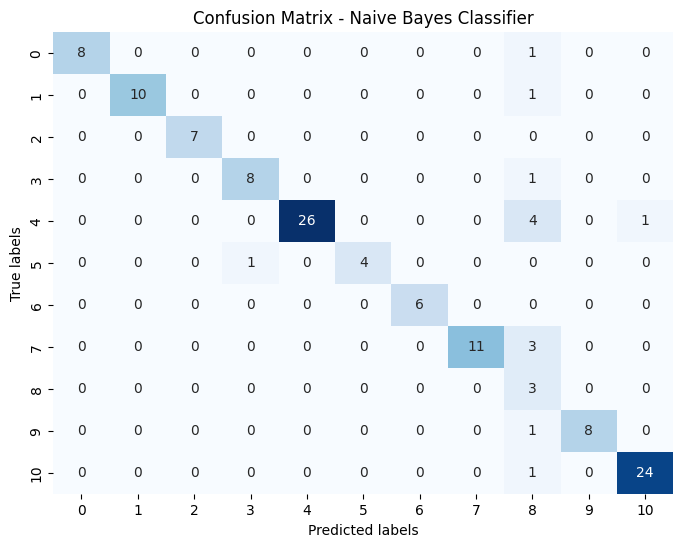

In [712]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train the Naive Bayes classifier
naive_bayes_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Generate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()


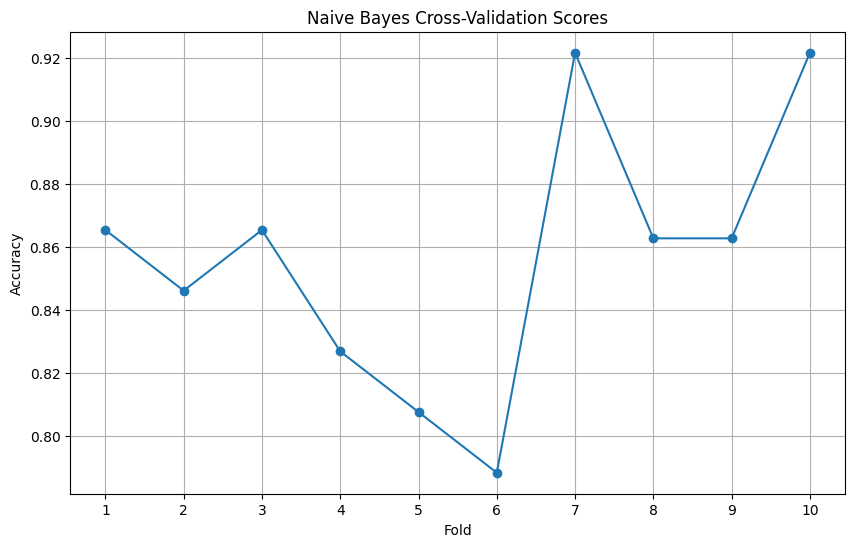

In [713]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Define the number of folds (e.g., k=5 for 5-fold cross-validation)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Perform k-fold cross-validation
cross_val_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kf)

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, k+1), cross_val_scores, marker='o', linestyle='-')
plt.title('Naive Bayes Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, k+1))
plt.grid(True)
plt.show()
